# Attention is All You Need

Code taken from: https://www.tensorflow.org/tutorials/text/transformer and revisited

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def get_angles(pos, i, n):
    """
    pos: position(s) for which to calculate the angles
    i: considered dimension(s) of the positional encoding
    n: dimension of the model
    """
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(n))
    return pos * angle_rates

In [3]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    
    return pos_encoding

In [4]:
pos_encoding = positional_encoding(50, 512)
print(pos_encoding.shape)

(1, 50, 512)


We can visualize each dimension of the positional encoding as a sinusoid. The positional encoding of a determined position is the value of all the sinusoids in that position.

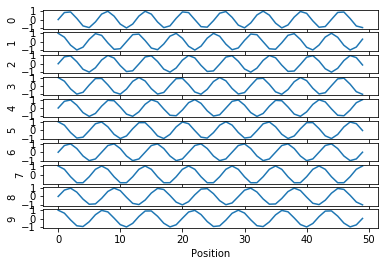

In [29]:
fig, axs = plt.subplots(10, 1)
plt.xlabel('Position')

for dim in range(0, 10):
    axs[dim].plot(np.arange(0, 50), pos_encoding[0, :, dim])
    axs[dim].set_ylabel(f"{dim}")

plt.savefig("positional_encoding.png")

Analyze the first 10 dimensions of the positional encoding of the position 10.

In [6]:
pos_encoding[0, 10, :10]

array([-0.54402111, -0.83907153, -0.22002319, -0.97549464,  0.11877648,
       -0.99292102,  0.43307962, -0.90135567,  0.69263418, -0.72128905])

Same for position 20:

In [7]:
pos_encoding[0, 20, :10]

array([ 0.91294525,  0.40808206,  0.42926288,  0.9031796 , -0.23587133,
        0.97178429, -0.78071754,  0.62488409, -0.9991789 ,  0.04051578])

We can plot the positional encoding in a grid.
If we look at a row we are considering the encoding of that position.

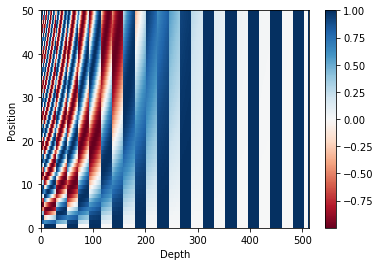

In [22]:
pcol = plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.savefig("positional_encoding_colormesh.png")

## Attention

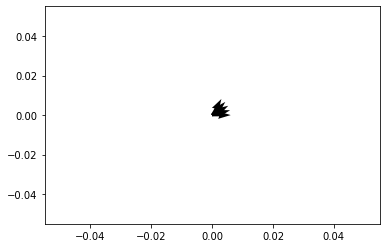

In [42]:
angles = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/3]

for angle in angles:
    vector = (np.cos(angle), np.sin(angle))
    plt.quiver(0, 0, vector[0], vector[1])

plt.xlim = 1
plt.ylim = 1

In [45]:
np.cos(np.pi/3)

0.5000000000000001

In [46]:
k1 = [np.cos(0), np.sin(0)]
k2 = [np.cos(np.pi/4), np.sin(np.pi/4)]
k3 = [np.cos(np.pi/2), np.sin(np.pi/2)]

q = [np.cos(np.pi/3), np.sin(np.pi/3)]

In [47]:
K = np.vstack((k1, k2, k3))

In [56]:
qk = q @ K.T
qk

array([0.5       , 0.96592583, 0.8660254 ])

In [54]:
from scipy import special

In [55]:
special.softmax(qk)

array([0.24780195, 0.39486964, 0.35732841])